In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
new_df=pd.read_csv('/content/drive/MyDrive/Asthma/new_asthma.csv')
new_df.head()


,Unnamed: 0,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,0,3.470589,3.067944,1,1,1,0,0,1,0


In [4]:
new_df.drop('Unnamed: 0',axis=1,inplace=True)

# Model Building

SVM

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [6]:
X = new_df.drop('Diagnosis', axis=1)
y = new_df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.svm import SVC
scaler = StandardScaler()
# Fit the scaler on the training data
scaler.fit(X_train)
# Transform the training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
from sklearn.svm import SVC
svm_model = SVC(C = 0.1, kernel = 'rbf')
svm_model.fit(X_train, y_train)
print(svm_model.score(X_train, y_train))

y_pred = svm_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.818632855567806
0.7797356828193832
              precision    recall  f1-score   support

           0       0.86      0.69      0.77       479
           1       0.72      0.88      0.79       429

    accuracy                           0.78       908
   macro avg       0.79      0.78      0.78       908
weighted avg       0.79      0.78      0.78       908



In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.22026431718061673

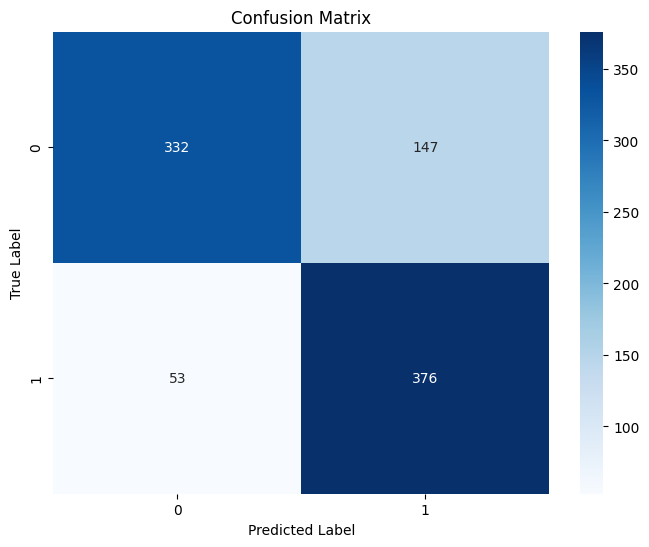

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()